## PREDICTION OF FRADULENT TRANSACTIONS

In [113]:
import pandas as pd
import numpy as np

In [168]:
data_sample = pd.read_csv(r"C:\Users\Admin\Downloads\Fraud.csv")

# Randomly sample 10,000 rows
random_sample = data_sample.sample(n=1000000, random_state=42)

# Check the sample
print(random_sample.head())
data_ = random_sample


         step      type      amount     nameOrig  oldbalanceOrg  \
3737323   278   CASH_IN   330218.42   C632336343       20866.00   
264914     15   PAYMENT    11647.08  C1264712553       30370.00   
85647      10   CASH_IN   152264.21  C1746846248      106589.00   
5899326   403  TRANSFER  1551760.63   C333676753           0.00   
2544263   206   CASH_IN    78172.30   C813403091     2921331.58   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
3737323       351084.42   C834976624       452419.57       122201.15        0   
264914         18722.92   M215391829            0.00            0.00        0   
85647         258853.21  C1607284477       201303.01        49038.80        0   
5899326            0.00  C1564353608      3198359.45      4750120.08        0   
2544263      2999503.88  C1091768874       415821.90       337649.60        0   

         isFlaggedFraud  
3737323               0  
264914                0  
85647                 0  
589932

In [169]:
data_['isFraud'].value_counts()

isFraud
0    998734
1      1266
Name: count, dtype: int64

Shows imbalance in dataset

In [177]:
data['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    999997
1         3
Name: count, dtype: int64

In [170]:
data_['isFlaggedFraud'] = data_sample['isFlaggedFraud'].astype(int)
data_.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int32
dtype: object

In [203]:
unique_types = data_['type'].unique()
print("Unique values in 'type' column:", unique_types)

Unique values in 'type' column: ['CASH_IN' 'PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT']


Categorical variable type is converted to dummy variables

In [204]:
data_onehot = pd.get_dummies(data_, columns=['type'], drop_first=False)

Checking missing values if any

In [205]:
data_onehot.isnull().sum()

step              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
type_CASH_IN      0
type_CASH_OUT     0
type_DEBIT        0
type_PAYMENT      0
type_TRANSFER     0
dtype: int64

No missing values found

In [174]:
data_onehot.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
3737323,278,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0,True,False,False,False,False
264914,15,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0,False,False,False,True,False
85647,10,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0,True,False,False,False,False
5899326,403,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0,False,False,False,False,True
2544263,206,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0,True,False,False,False,False


In [175]:
data = data_onehot
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,243.512303,1.804999e+05,8.319644e+05,8.534179e+05,1.105606e+06,1.230483e+06,0.001266,0.000003
std,142.415978,6.170112e+05,2.884868e+06,2.921068e+06,3.417108e+06,3.698862e+06,0.035558,0.001732
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,1.336029e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,239.000000,7.487864e+04,1.425613e+04,0.000000e+00,1.329588e+05,2.153516e+05,0.000000,0.000000
75%,335.000000,2.092836e+05,1.071842e+05,1.443272e+05,9.482025e+05,1.115964e+06,0.000000,0.000000
max,742.000000,6.933732e+07,4.039905e+07,3.795009e+07,3.553805e+08,3.560159e+08,1.000000,1.000000


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 3737323 to 1023694
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1000000 non-null  int64  
 1   amount          1000000 non-null  float64
 2   nameOrig        1000000 non-null  object 
 3   oldbalanceOrg   1000000 non-null  float64
 4   newbalanceOrig  1000000 non-null  float64
 5   nameDest        1000000 non-null  object 
 6   oldbalanceDest  1000000 non-null  float64
 7   newbalanceDest  1000000 non-null  float64
 8   isFraud         1000000 non-null  int64  
 9   isFlaggedFraud  1000000 non-null  int32  
 10  type_CASH_IN    1000000 non-null  bool   
 11  type_CASH_OUT   1000000 non-null  bool   
 12  type_DEBIT      1000000 non-null  bool   
 13  type_PAYMENT    1000000 non-null  bool   
 14  type_TRANSFER   1000000 non-null  bool   
dtypes: bool(5), float64(5), int32(1), int64(2), object(2)
memory usage: 84.9+ MB


## EDA

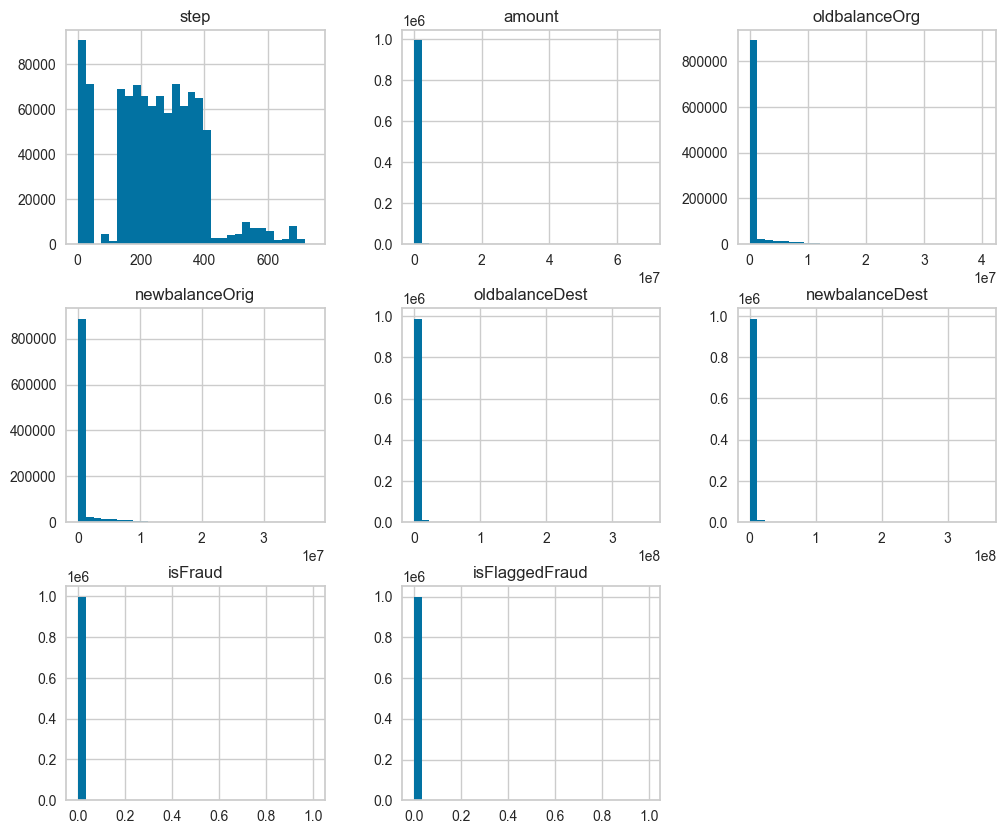

In [178]:
#!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

data.hist(figsize=(12, 10), bins=30)
plt.show()


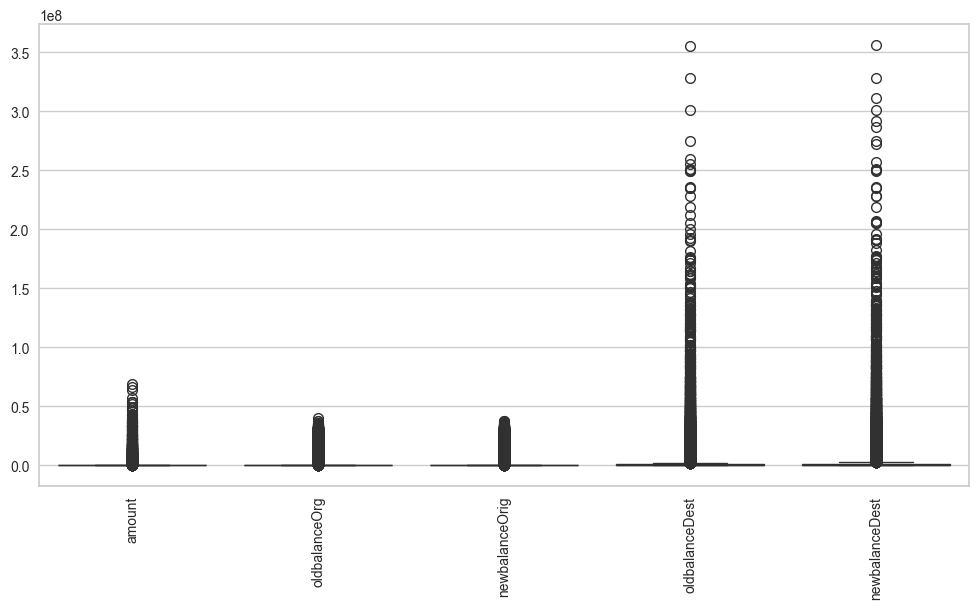

In [179]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.select_dtypes(include=['float32', 'float64']))
plt.xticks(rotation=90)
plt.show()


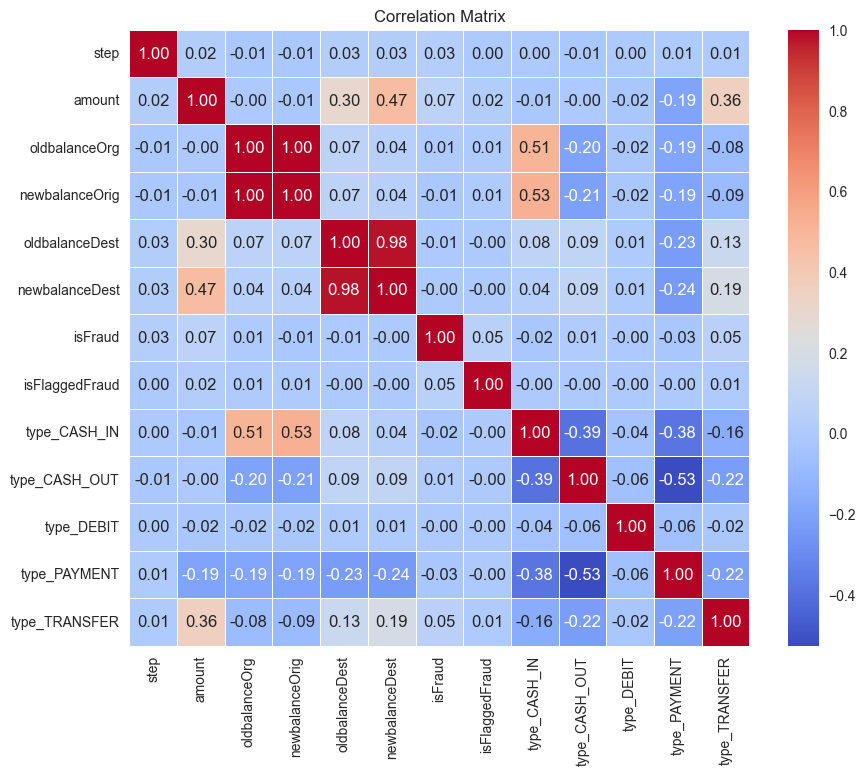

In [180]:
numeric_data = data.select_dtypes(include=['float64', 'float32', 'int64', 'int32','bool'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, cmap='coolwarm',annot=True, fmt=".2f",linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

High correlation exists only between newbalanceDest and oldbalanceDest

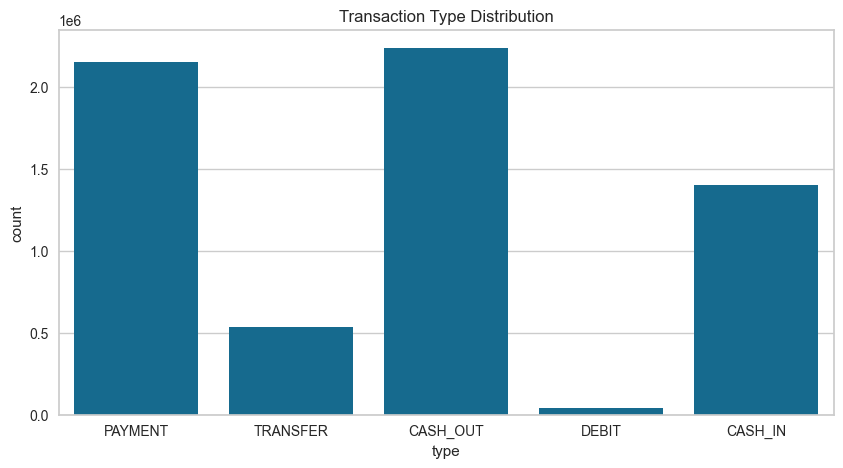

In [181]:
plt.figure(figsize=(10, 5))
sns.countplot(x='type', data=data_sample)
plt.title('Transaction Type Distribution')
plt.show()


In [182]:
# Printing Skewness
skewness = data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].skew()
print(skewness)


amount            31.314107
oldbalanceOrg      5.263898
newbalanceOrig     5.192138
oldbalanceDest    20.198992
newbalanceDest    19.649421
dtype: float64


Amount shows high skewness and can be binned 

In [183]:
numeric_cols = data.select_dtypes(include=[np.number])

# Handling infinite values
numeric_cols = numeric_cols.replace([np.inf, -np.inf], np.nan).dropna()

# Numeric cols
for col in numeric_cols.columns:
    numeric_cols[col] = pd.to_numeric(numeric_cols[col], errors='coerce')

# Drop any rows that contain NaN after coercing to numeric
numeric_cols = numeric_cols.dropna()

# VIF calculation
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_cols.columns

# Calculate VIF for each numeric feature
vif_data["VIF"] = [variance_inflation_factor(numeric_cols.values, i)
                   for i in range(len(numeric_cols.columns))]

# Output the VIF values
print(vif_data)

          feature         VIF
0            step    1.189441
1          amount    4.360574
2   oldbalanceOrg  574.929576
3  newbalanceOrig  577.534341
4  oldbalanceDest   77.763176
5  newbalanceDest   90.600931
6         isFraud    1.170481
7  isFlaggedFraud    1.004200


Thus oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest has very high VIF posing threat of multicollinearity in these variables

## MODEL

Since the data is huge, trying on every ml model possible with best features extracted and then training the best fitted model requires high computational time and resources. Instead, using automations like pycaret can be quite helpful in deciding the best model. The objective is to predict the fradulent transactions which is a classification problem. Note : Had the data not being appended with isFraud column, the problem would be anamoly detection. In that case, pycaret anamoly would have been used as here classification is used.

In [184]:
from pycaret.classification import *

In [ ]:
mod = setup(data_func=load_data, target = 'isFraud', session_id =123)

In [187]:
data_types = mod.X.dtypes
data_types

step                 int32
amount             float32
oldbalanceOrg      float32
newbalanceOrig     float32
oldbalanceDest     float32
newbalanceDest     float32
isFlaggedFraud    category
type_CASH_IN          bool
type_CASH_OUT         bool
type_DEBIT            bool
type_PAYMENT          bool
type_TRANSFER         bool
dtype: object

Here, the isFlaggedFraud col is considered as int which needs to be modelled as a category

In [ ]:
data['isFlaggedFraud'] = data['isFlaggedFraud'].astype('category')
def load_data():
    return data

Data cleaning including missing values, outliers and multicollinearity

The target variable here - isFraud which will be dependent on amount and type. 
Categorical variables like Name of Customer who started the transactions or name of receipient of the transaction are irrelevant in predicting fradulent transactions, hence are ignored. 
These will be helpful in deciding the frauds, but here we are considering transactions.
isFlaggedFraud is ignored in this model as it predicts 16/8213 frauds ie 0.001 only, of which lesser will be accurate.
Hence for the time being, amount entirely is considered, and the business model that had flagged illegal attempts is kept on hold. 

Other Features will be selected by feature selection estimator using random forest classifier aiding to determine the feature importance and its score. As seen above the data has a lot of imbalance, obviously there will be lesser frauds compared to the clean transactions, hence SMOTE is used. Stratified k fold strategy is used for cross validating the models.
5 folds of data are used for cv as if lesser might not capture the variations, and more could be used if computational resources are available.

Outliers and multicollinearity is removed, spliting data in train and test sets in a stratified manner, reason being the same as of imbalance. 
Multicollinearity threashold being 0.9 (default) and outliers % being 0.05 trim (default)
Data needs to scaled and transformed as skewness are higher for nearly all variables. 

In [190]:
mod = setup(data_func=load_data, 
            target = 'isFraud', 
            session_id =123, 
            remove_outliers = True,
            remove_multicollinearity = True,
            data_split_stratify=True,
            keep_features = ['type_CASH_IN','type_CASH_OUT','type_PAYMENT','type_DEBIT','type_TRANSFER','isFlaggedFraud'],
            ignore_features=['nameOrig', 'nameDest'],
            bin_numeric_features = ['amount'],
            feature_selection=True,
            normalize=True,                    # Normalize the data
            transformation=True, 
        # Apply transformation ( based on skewness)
           
            fix_imbalance = True
           )


[LightGBM] [Info] Number of positive: 664558, number of negative: 664558
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 768
[LightGBM] [Info] Number of data points in the train set: 1329116, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Description,Value
0,Session id,123
1,Target,isFraud
2,Target type,Binary
3,Original data shape,"(1000000, 15)"
4,Transformed data shape,"(1629116, 8)"
5,Transformed train set shape,"(1329116, 8)"
6,Transformed test set shape,"(300000, 8)"
7,Ignore features,2
8,Numeric features,6
9,Categorical features,1


BEST MODEL

In [192]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9987,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,30.9190
qda,Quadratic Discriminant Analysis,0.9981,0.8737,0.0045,0.0018,0.0026,0.0022,0.0024,30.8670
dt,Decision Tree Classifier,0.9759,0.6194,0.2620,0.0141,0.0267,0.0243,0.0559,16.8600
et,Extra Trees Classifier,0.9743,0.9018,0.3398,0.0170,0.0324,0.0301,0.0714,72.5290
rf,Random Forest Classifier,0.9688,0.8519,0.3206,0.0132,0.0254,0.0230,0.0598,127.0870
knn,K Neighbors Classifier,0.9406,0.7418,0.4867,0.0104,0.0203,0.0179,0.0643,26.7920
lightgbm,Light Gradient Boosting Machine,0.9225,0.9264,0.6219,0.0101,0.0199,0.0175,0.0723,38.9120
ada,Ada Boost Classifier,0.9055,0.8808,0.6624,0.0088,0.0175,0.0150,0.0690,67.9660
gbc,Gradient Boosting Classifier,0.9042,0.9593,0.8613,0.0113,0.0222,0.0198,0.0921,171.5490
lr,Logistic Regression,0.8676,0.9765,0.9572,0.0091,0.0180,0.0155,0.0862,15.7590


In [196]:
print(best_model)


DummyClassifier(constant=None, random_state=123, strategy='prior')


The best model in pycaret is calculated only considering accuraccy, but we shall conisder all the parameters according to which the best model is gbc

## Considering smaller chunk

In [200]:
data_small = pd.read_csv(r"C:\Users\Admin\Downloads\Fraud.csv")

# Randomly sample 10,000 rows
random_sample = data_small.sample(n=100000, random_state=42)

# Check the sample
print(random_sample.head())
data_s = random_sample


         step      type      amount     nameOrig  oldbalanceOrg  \
3737323   278   CASH_IN   330218.42   C632336343       20866.00   
264914     15   PAYMENT    11647.08  C1264712553       30370.00   
85647      10   CASH_IN   152264.21  C1746846248      106589.00   
5899326   403  TRANSFER  1551760.63   C333676753           0.00   
2544263   206   CASH_IN    78172.30   C813403091     2921331.58   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
3737323       351084.42   C834976624       452419.57       122201.15        0   
264914         18722.92   M215391829            0.00            0.00        0   
85647         258853.21  C1607284477       201303.01        49038.80        0   
5899326            0.00  C1564353608      3198359.45      4750120.08        0   
2544263      2999503.88  C1091768874       415821.90       337649.60        0   

         isFlaggedFraud  
3737323               0  
264914                0  
85647                 0  
589932

In [201]:
##### taking n = 100000
data_s['isFraud'].value_counts()

isFraud
0    99859
1      141
Name: count, dtype: int64

In [202]:
data_s['isFlaggedFraud'] = data_small['isFlaggedFraud'].astype(int)
data_s.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int32
dtype: object

In [203]:
unique_types = data_s['type'].unique()
print("Unique values in 'type' column:", unique_types)

Unique values in 'type' column: ['CASH_IN' 'PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT']


In [204]:
data_onehot_s = pd.get_dummies(data_s, columns=['type'], drop_first=False)

In [205]:
data_onehot_s.isnull().sum()

step              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
type_CASH_IN      0
type_CASH_OUT     0
type_DEBIT        0
type_PAYMENT      0
type_TRANSFER     0
dtype: int64

In [206]:
data_onehot_s.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
3737323,278,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0,True,False,False,False,False
264914,15,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0,False,False,False,True,False
85647,10,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0,True,False,False,False,False
5899326,403,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0,False,False,False,False,True
2544263,206,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0,True,False,False,False,False


In [185]:
def load_data():
    return data
#Due to high computation, data function is used

In [207]:
data1 = data_onehot_s
data1.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000
mean,243.709070,1.805811e+05,8.366804e+05,8.582234e+05,1.104193e+06,1.230055e+06,0.001410,0.000010
std,142.518613,5.586699e+05,2.901104e+06,2.936799e+06,3.223011e+06,3.475326e+06,0.037524,0.003162
min,1.000000,9.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,1.350821e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,240.000000,7.603086e+04,1.393850e+04,0.000000e+00,1.387482e+05,2.185786e+05,0.000000,0.000000
75%,335.000000,2.091130e+05,1.070771e+05,1.464169e+05,9.605963e+05,1.126011e+06,0.000000,0.000000
max,736.000000,3.697390e+07,3.359321e+07,3.388709e+07,2.362896e+08,2.724047e+08,1.000000,1.000000


In [208]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 3737323 to 6142173
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   amount          100000 non-null  float64
 2   nameOrig        100000 non-null  object 
 3   oldbalanceOrg   100000 non-null  float64
 4   newbalanceOrig  100000 non-null  float64
 5   nameDest        100000 non-null  object 
 6   oldbalanceDest  100000 non-null  float64
 7   newbalanceDest  100000 non-null  float64
 8   isFraud         100000 non-null  int64  
 9   isFlaggedFraud  100000 non-null  int32  
 10  type_CASH_IN    100000 non-null  bool   
 11  type_CASH_OUT   100000 non-null  bool   
 12  type_DEBIT      100000 non-null  bool   
 13  type_PAYMENT    100000 non-null  bool   
 14  type_TRANSFER   100000 non-null  bool   
dtypes: bool(5), float64(5), int32(1), int64(2), object(2)
memory usage: 8.5+ MB


In [209]:
data1['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    99999
1        1
Name: count, dtype: int64

In [210]:
data1['isFlaggedFraud'] = data1['isFlaggedFraud'].astype('category')
def load():
    return data1

Data cleaning including missing values, outliers and multicollinearity

SETUP

In [211]:
mod = setup(data_func=load, 
            target = 'isFraud', 
            session_id =123, 
            remove_outliers = True,
            remove_multicollinearity = True,
            data_split_stratify=True,
            keep_features = ['type_CASH_IN','type_CASH_OUT','type_PAYMENT','type_DEBIT','type_TRANSFER','isFlaggedFraud'],
            ignore_features=['nameOrig', 'nameDest'],
            bin_numeric_features = ['amount'],
            feature_selection=True,
            normalize=True,                    # Normalize the data
            transformation=True, 
        # Apply transformation ( based on skewness)
           
            fix_imbalance = True
           )


,Description,Value
0,Session id,123
1,Target,isFraud
2,Target type,Binary
3,Original data shape,"(100000, 15)"
4,Transformed data shape,"(162906, 9)"
5,Transformed train set shape,"(132906, 9)"
6,Transformed test set shape,"(30000, 9)"
7,Ignore features,2
8,Numeric features,6
9,Categorical features,1


In [191]:

data_types = mod.X.dtypes
data_types

step                 int32
amount             float32
oldbalanceOrg      float32
newbalanceOrig     float32
oldbalanceDest     float32
newbalanceDest     float32
isFlaggedFraud    category
type_CASH_IN          bool
type_CASH_OUT         bool
type_DEBIT            bool
type_PAYMENT          bool
type_TRANSFER         bool
dtype: object

BEST MODEL

In [212]:
small_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9986,0.8491,0.0000,0.0000,0.0000,0.0000,0.0000,1.3080
dummy,Dummy Classifier,0.9986,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.2260
dt,Decision Tree Classifier,0.9765,0.5588,0.1400,0.0092,0.0172,0.0146,0.0305,1.4920
et,Extra Trees Classifier,0.9752,0.8962,0.2200,0.0136,0.0255,0.0229,0.0493,2.3910
rf,Random Forest Classifier,0.9726,0.8668,0.2411,0.0132,0.0250,0.0224,0.0509,5.6800
knn,K Neighbors Classifier,0.9571,0.7359,0.3733,0.0128,0.0247,0.0220,0.0625,1.8160
lightgbm,Light Gradient Boosting Machine,0.9513,0.9239,0.4133,0.0125,0.0242,0.0215,0.0650,1.5870
gbc,Gradient Boosting Classifier,0.9246,0.9325,0.6256,0.0119,0.0233,0.0206,0.0787,6.3890
ada,Ada Boost Classifier,0.9155,0.8984,0.5222,0.0089,0.0175,0.0147,0.0597,2.8130
lr,Logistic Regression,0.8965,0.9791,0.9300,0.0126,0.0249,0.0221,0.1015,1.8220


From the above fitting, the best model values are highlighted which can be used ahead for hyperparameter tuning is perfomed so as to capture the required patterns, better learn the model w/o underfitting or overfitting it. Aim is to ensure better performance on unseen data.

In [213]:
print(small_model)


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


Considering other parameters like AUC,Recall, etc Logistic Regression model is best 

In [214]:
logr_model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8903,0.9982,1.0000,0.0116,0.0229,0.0204,0.1015
1,0.9089,0.9586,0.9000,0.0139,0.0274,0.0247,0.1056
2,0.8887,0.9911,1.0000,0.0127,0.0250,0.0223,0.1061
3,0.9143,0.9493,0.7000,0.0116,0.0228,0.0200,0.0827
4,0.8909,0.9931,1.0000,0.0129,0.0255,0.0228,0.1073
5,0.9037,0.9823,1.0000,0.0146,0.0288,0.0261,0.1149
6,0.8834,0.9946,1.0000,0.0121,0.0239,0.0212,0.1034
7,0.8819,0.9789,0.9000,0.0108,0.0213,0.0185,0.0911
8,0.8981,0.9695,0.9000,0.0125,0.0246,0.0219,0.0992


In [2]:
#Cross validation by kfold method is performed above

Fine tuning the model

In [215]:
tuned_model = tune_model(logr_model)
final_model = finalize_model(logr_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8903,0.9982,1.0000,0.0116,0.0229,0.0204,0.1015
1,0.9089,0.9586,0.9000,0.0139,0.0274,0.0247,0.1056
2,0.8887,0.9911,1.0000,0.0127,0.0250,0.0223,0.1061
3,0.9143,0.9493,0.7000,0.0116,0.0228,0.0200,0.0827
4,0.8910,0.9931,1.0000,0.0129,0.0255,0.0228,0.1074
5,0.9037,0.9823,1.0000,0.0146,0.0288,0.0261,0.1149
6,0.8834,0.9946,1.0000,0.0121,0.0239,0.0212,0.1034
7,0.8819,0.9789,0.9000,0.0108,0.0213,0.0185,0.0911
8,0.8981,0.9695,0.9000,0.0125,0.0246,0.0219,0.0992


Fitting 10 folds for each of 10 candidates, totalling 100 fits


PREDICTIONS

In [216]:
predictions = predict_model(final_model)
print(predictions.head())

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8841,0.9770,0.9524,0.0114,0.0225,0.0198,0.0972


         step        amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
3871572   283  1.454267e+07       0.000000        0.000000    1.493533e+07   
682862     36  8.315610e+03       0.000000        0.000000    0.000000e+00   
5575015   393  1.137978e+05       0.000000        0.000000    1.257599e+06   
1926828   168  1.163922e+04   24230.130859    12590.910156    0.000000e+00   
5163933   358  4.750644e+04   62848.000000    15341.559570    8.860585e+04   

         newbalanceDest isFlaggedFraud  type_CASH_IN  type_CASH_OUT  \
3871572    2.947800e+07              0         False          False   
682862     0.000000e+00              0         False          False   
5575015    1.371396e+06              0         False           True   
1926828    0.000000e+00              0         False          False   
5163933    1.361123e+05              0         False           True   

         type_DEBIT  type_PAYMENT  type_TRANSFER  isFraud  prediction_label  \
3871572       False      

CHECK THE FEATURES USED

In [167]:
print(mod.get_config('X').columns)

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')


# SUMMARY

## As the computation was huge, at the start 1/6th of the data selected randomly is analysed, processed and set up. While creating the model, pyCaret gives best fit only as per accuracy, whereas if considered all the AUC, Recall, F1, Precision values, gbc - Gradient Boost Classifier turns out to be the best for 1/6th of data. This too is high computational for tuning and predictions, hence yet another smaller chunk is considered for which the best model is Logistic Regression. 